/Users/sgillen/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:06<00:18,  6.25s/it]

 50%|█████     | 2/4 [00:13<00:12,  6.44s/it]

 75%|███████▌  | 3/4 [00:18<00:06,  6.04s/it]

100%|██████████| 4/4 [00:22<00:00,  5.49s/it]

tensor(-1281.3051)


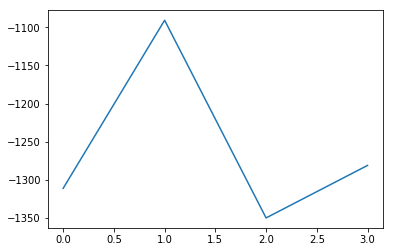

In [47]:
import torch.nn as nn
from seagul.rl.algos.ppo import ppo
from seagul.nn import MLP, CategoricalMLP
import torch
import matplotlib.pyplot as plt
from seagul.rl.models import PpoModel
from multiprocessing import Process
#%matplotlib inline

torch.set_default_dtype(torch.double)

input_size = 3
output_size = 1
layer_size = 64
num_layers = 2
activation = nn.ReLU

policy = MLP(input_size, output_size, num_layers, layer_size, activation)
value_fn = MLP(input_size, 1, num_layers, layer_size, activation)
model = PpoModel(policy, value_fn, action_var=.1, discrete=False)



# Define our hyper parameters
arg_dict = {
'epoch_batch_size' : 2048,  # how many steps we want to use before we update our gradients
'env_timesteps' : 199,  # number of steps in an episode (unless we terminate early)
'reward_stop' : -200,
'policy_batch_size' : 512,
'value_batch_size' : 512,
'v_epochs' : 10,
'p_epochs' : 10,
'policy_lr' : 1e-2,
'value_lr' : 1e-2,
'action_var_schedule' : [.707],
}

t_model, rewards, var_dict = ppo("Pendulum-v0", 4, model, seed=0, **arg_dict)

plt.plot(rewards)

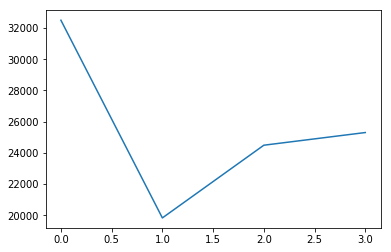

In [48]:
plt.plot(var_dict['v_loss_hist'])

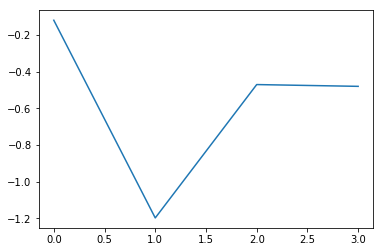

In [49]:
plt.plot(var_dict['p_loss_hist'])

In [39]:
var_dict

torch.Size([130, 1])

In [43]:
var_dict['action_tensor'].shape

torch.Size([0])

In [18]:
model.value_fn(var_dict['state'])

tensor([-0.2159], grad_fn=<AddBackward0>)

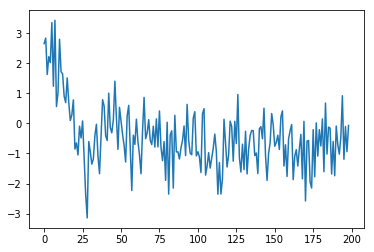

In [45]:
plt.plot(var_dict['ep_action_tensor'].detach().numpy())

In [50]:
var_dict

{'v_loss': tensor(25304.4092, grad_fn=<DivBackward0>),
 'local_values': tensor([[-189.3476],
         [-194.9088],
         [-427.7840],
         [-497.5156],
         [-639.6766],
         [-189.2468],
         [-318.2213],
         [-439.0381],
         [-714.8854],
         [-604.7196],
         [-193.6211],
         [ -96.6729],
         [-275.0692],
         [  -6.9107],
         [ -81.5578],
         [-102.1865],
         [-331.9354],
         [ -65.7168],
         [-254.7586],
         [-355.3970],
         [-308.8361],
         [-305.0511],
         [-589.7993],
         [-636.8769],
         [-302.6014],
         [-686.8657],
         [-154.7719],
         [-334.3636],
         [-395.4953],
         [-613.0577],
         [-189.0541],
         [  -1.4604],
         [ -14.1409],
         [-359.3916],
         [-656.4270],
         [ -31.1234],
         [-613.4050],
         [ -22.7432],
         [-142.5959],
         [-426.2518],
         [-337.8629],
         [-391.2425],
     